In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {return false;}
// Avoid scrollable output for many plots

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import itertools
import tqdm
import matplotlib.pyplot as plt

sns.set(font_scale=1.5)
name = 'Citroen C1'
df = pd.read_parquet('data_2020-Aug-18.parquet')
print('Number cars: {}'.format(df.shape[0]));
df.head()

Number cars: 415


,headline,year,odometer,price,description,horsepower,region,fuelType,engineSize,trim
0,"Citroën C1 1,0 e-VTi 68 Scoop 5d",2015,62000.0,54900.0,"Airc., Fjernb. C.Lås, Kørecomputer, Infocenter...",68.0,Fyn,Gasoline,"1,0",Scoop
1,"Citroën C1 1,0i Exclusive 5d",2014,115000.0,39900.0,"Netop Nu Kampagne <<, Køb Bil Uden Udbetaling,...",68.0,Fyn,Gasoline,"1,0",Exclusive
2,"Citroën C1 1,0 e-VTi 68 Scoop 5d",2014,72000.0,51900.0,"C1 I Den Helt Rigtige Farve, Flot Ude Som Inde...",68.0,København,Gasoline,"1,0",Scoop
3,"Citroën C1 1,0 VTi 72 VTR Airscape 5d",2019,7000.0,109900.0,"RIGTIG FIN LILLE SOMMERBIL, MED MULIGHED FOR V...",72.0,Fyn,Gasoline,"1,0",VTR
4,"Citroën C1 1,0 VTi 72 Triumph 5d",2020,4000.0,89900.0,"Abs, 6 Airbags, Servo, Esp, Antispin, Fjernb. ...",72.0,Fyn,Gasoline,"1,0",Triumph


In [3]:
df[df.isnull().any(axis=1)]

,headline,year,odometer,price,description,horsepower,region,fuelType,engineSize,trim
311,"Citroën C1 1,0 VTi 72 Triumph Airscape 5d",2020,NaN,127240.0,"Fjernb. C.Lås, Sædevarme, Højdejust. Forsæde, ...",72.0,Syd- og Sønderjylland,Gasoline,"1,0",Triumph


In [4]:
df.describe()

,year,odometer,price,horsepower
count,415.000000,4.140000e+02,415.000000,415.000000
mean,2014.281928,8.516184e+04,54694.134940,71.291566
std,3.460618,1.100062e+05,22177.746923,5.562930
min,2006.000000,1.000000e+03,14000.000000,54.000000
25%,2012.000000,3.625000e+04,36900.000000,68.000000
50%,2014.000000,7.700000e+04,52500.000000,68.000000
75%,2017.000000,1.170000e+05,69900.000000,72.000000
max,2020.000000,2.010000e+06,127240.000000,82.000000


In [5]:
# Data clean
df.loc[df.odometer == 2010000.0, 'odometer'] = np.nan

In [6]:
df.describe()

,year,odometer,price,horsepower
count,415.000000,413.000000,415.000000,415.000000
mean,2014.281928,80501.213075,54694.134940,71.291566
std,3.460618,55823.258347,22177.746923,5.562930
min,2006.000000,1000.000000,14000.000000,54.000000
25%,2012.000000,36000.000000,36900.000000,68.000000
50%,2014.000000,77000.000000,52500.000000,68.000000
75%,2017.000000,117000.000000,69900.000000,72.000000
max,2020.000000,281000.000000,127240.000000,82.000000


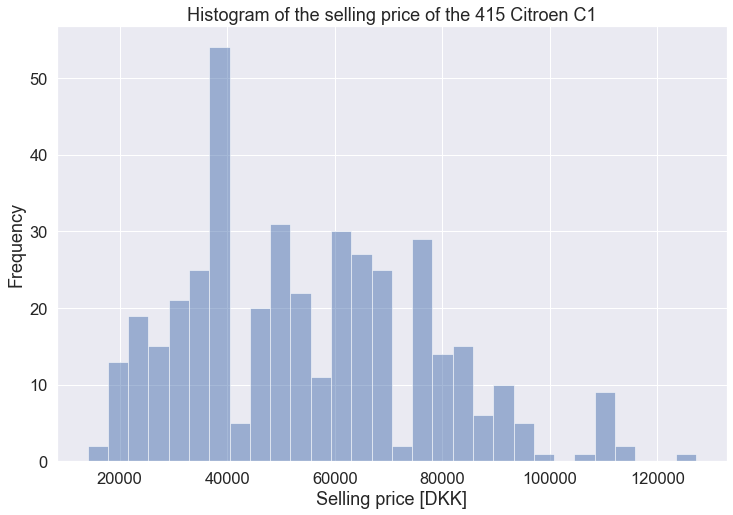

In [7]:
plt.rcParams["figure.figsize"] =(12,8)
ax = df['price'].plot.hist(bins=30, alpha=0.5);
ax.set_xlabel('Selling price [DKK]');
ax.set_title(f"Histogram of the selling price of the {df.shape[0]} {name}");

In [8]:
# Plot correlation matrix
corr = df.corr()
cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr.style.background_gradient(cmap, axis=1).set_precision(2)

,year,odometer,price,horsepower
year,1.00,-0.75,0.89,0.52
odometer,-0.75,1.00,-0.83,-0.43
price,0.89,-0.83,1.00,0.47
horsepower,0.52,-0.43,0.47,1.00


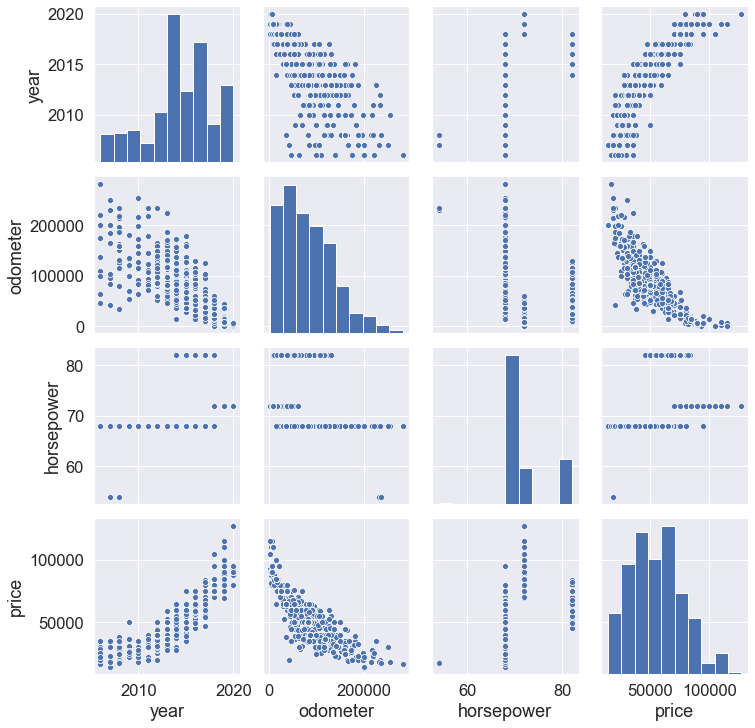

In [9]:
sns.pairplot(df[['year', 'odometer', 'horsepower', 'price']].copy());

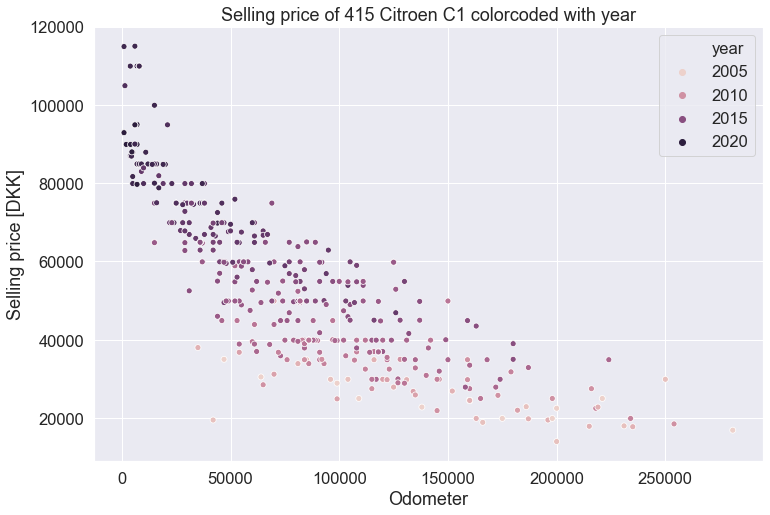

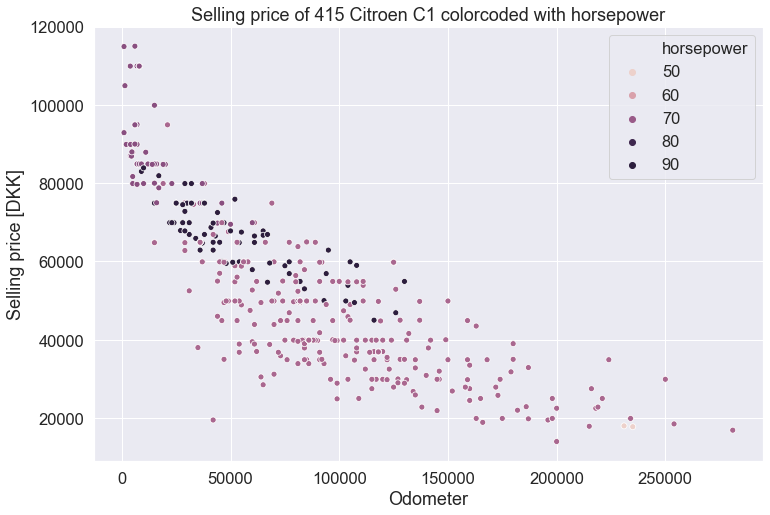

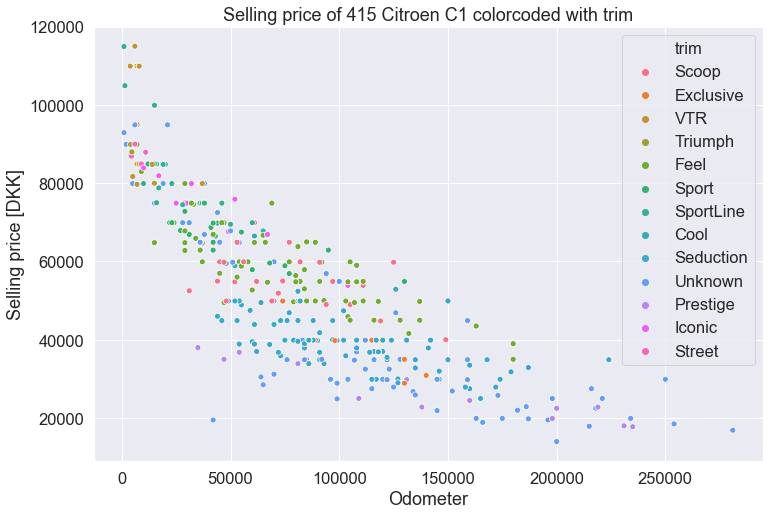

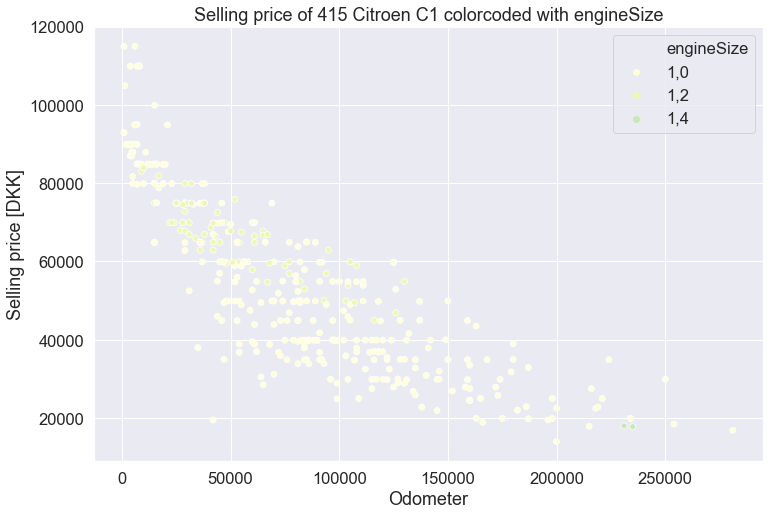

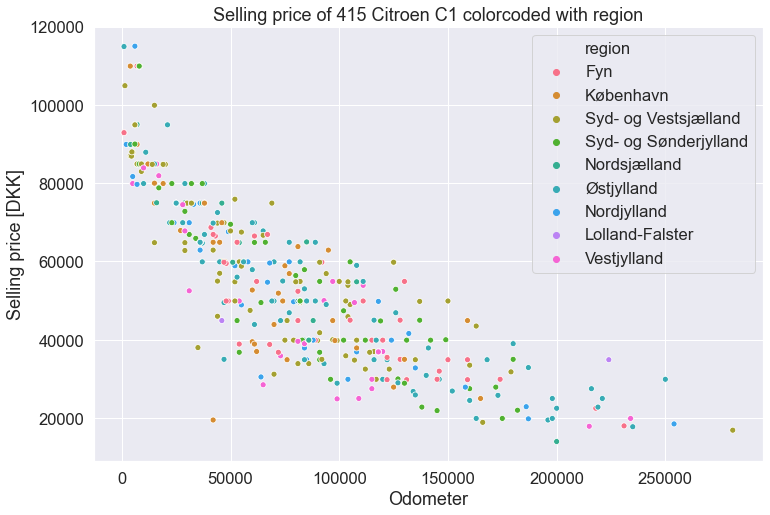

In [10]:
plt.rcParams["figure.figsize"] =(12,8)
customPalette = sns.set_palette(sns.color_palette(['#ffffd9','#edf8b1','#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#0c2c84']))
for hue in [
    'year',
    'horsepower',
    #'transmissionManual',
    #'fuelTypeGasoline',
    #'carTypeStationCar',
    'trim',
    'engineSize',
    'region']:
    ax = sns.scatterplot(x="odometer", y="price", hue=hue, data=df) #, palette=customPalette)
    ax.set_ylabel('Selling price [DKK]');
    ax.set_xlabel('Odometer');
    ax.set_title(f'Selling price of {df.shape[0]} {name} colorcoded with {hue}');
    plt.show()

# Selected

In [11]:
# Find cars comparable to my own
df_selected = df[
    (df.odometer < 90000) & 
    (df.odometer > 70000)
]
print(f'Number of selected cars: {df_selected.shape[0]}')
df_selected.head()

Number of selected cars: 59


,headline,year,odometer,price,description,horsepower,region,fuelType,engineSize,trim
2,"Citroën C1 1,0 e-VTi 68 Scoop 5d",2014,72000.0,51900.0,"C1 I Den Helt Rigtige Farve, Flot Ude Som Inde...",68.0,København,Gasoline,"1,0",Scoop
12,"Citroën C1 1,0i Seduction Clim 5d",2013,88000.0,44900.0,"DET BLÅ LYN!\nAirc., Fjernb. C.Lås, Startspærr...",68.0,Nordsjælland,Gasoline,"1,0",Seduction
13,"Citroën C1 1,0i Seduction Clim 5d",2014,76000.0,44900.0,"Airc., Fjernb. C.Lås, Startspærre, El-Ruder, S...",68.0,Syd- og Vestsjælland,Gasoline,"1,0",Seduction
15,"Citroën C1 1,0i Prestige Sensodrive 5d",2007,85000.0,34900.0,"Bemærk Aut. Gear, Lav Km, El-Ruder, Fjbt. Cent...",68.0,Nordjylland,Gasoline,"1,0",Prestige
26,"Citroën C1 1,0i Seduction Clim 5d",2012,81000.0,44900.0,"Abs, 4 Airbags, Servo, Fjernb. C.Lås, El-Ruder...",68.0,Fyn,Gasoline,"1,0",Seduction


In [12]:
df_selected.describe()

,year,odometer,price,horsepower
count,59.000000,59.000000,59.000000,59.000000
mean,2013.322034,81542.372881,47377.457627,69.423729
std,1.897736,4527.014826,8914.564331,4.267776
min,2007.000000,72000.000000,33900.000000,68.000000
25%,2012.000000,79000.000000,39900.000000,68.000000
50%,2013.000000,82000.000000,49500.000000,68.000000
75%,2015.000000,85000.000000,52690.000000,68.000000
max,2017.000000,89000.000000,64990.000000,82.000000


In [13]:
# Plot correlation matrix
corr = df_selected[['year', 'odometer', 'price']].corr()
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap=cmap);
cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr.style.background_gradient(cmap, axis=1).set_precision(2)

,year,odometer,price
year,1.00,-0.21,0.79
odometer,-0.21,1.00,-0.11
price,0.79,-0.11,1.00


In [14]:
df_selected.year.unique()

array([2014, 2013, 2007, 2012, 2015, 2016, 2011, 2017, 2008, 2010])

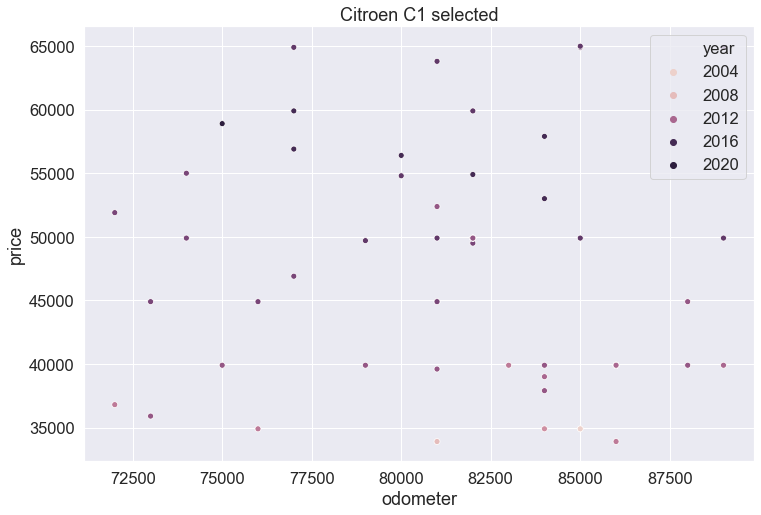

In [15]:
plt.rcParams["figure.figsize"] = (12,8)

ax = sns.scatterplot(
    x="odometer",
    y="price",
    hue="year",
    data=df_selected,
    #palette=sns.color_palette("colorblind"),
    #size="horsepower"
)
ax.set_title(f'{name} selected');

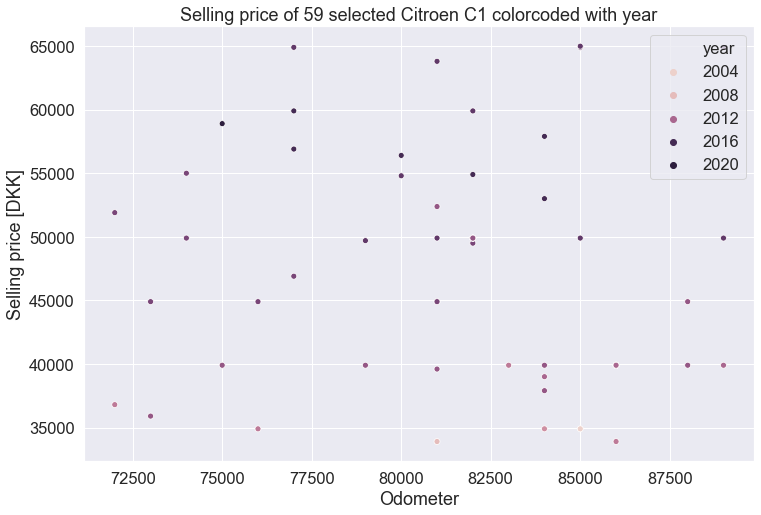

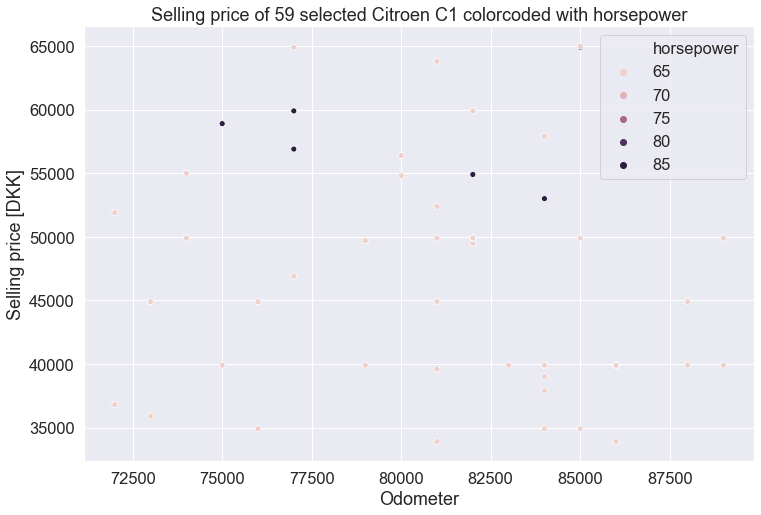

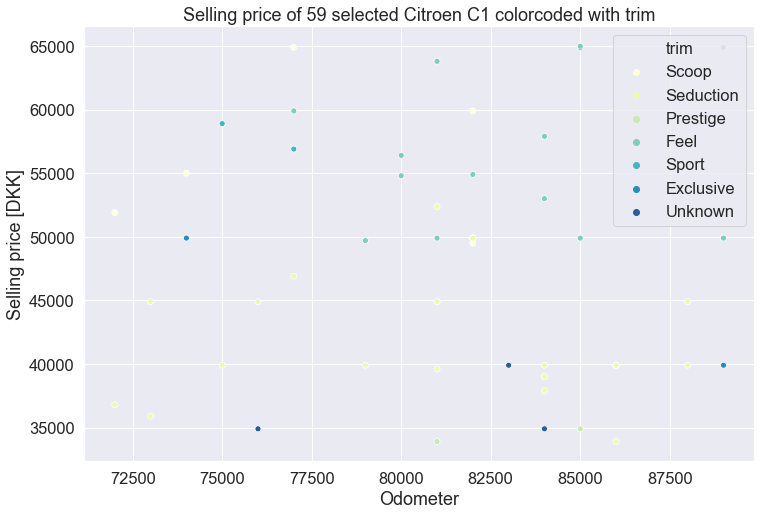

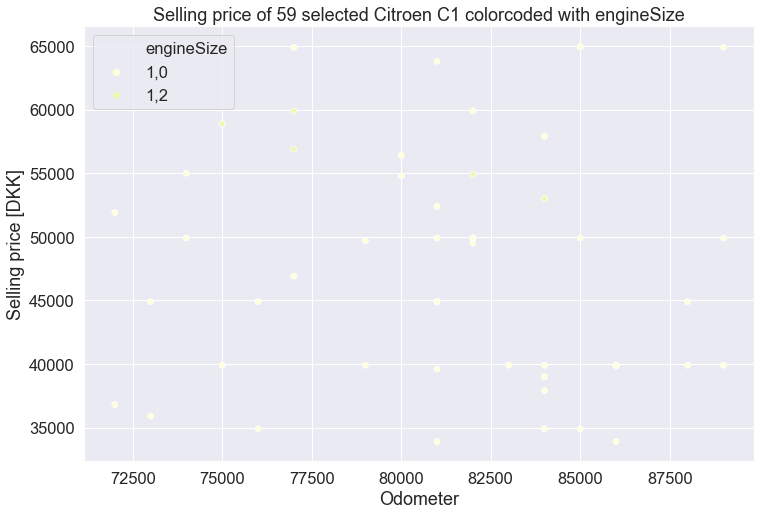

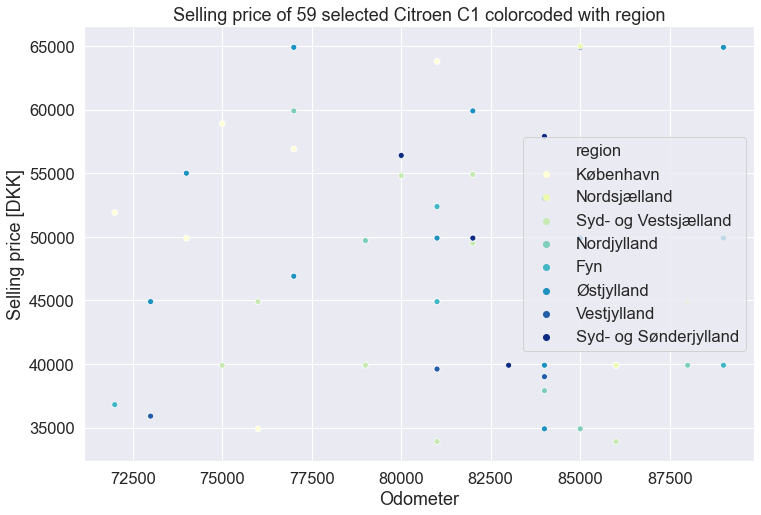

In [16]:
plt.rcParams["figure.figsize"] =(12,8)
customPalette = sns.set_palette(sns.color_palette(['#ffffd9','#edf8b1','#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#0c2c84']))
for hue in [
    'year',
    'horsepower',
    #'transmissionManual',
    #'fuelTypeGasoline',
    #'carTypeStationCar',
    'trim',
    'engineSize',
    'region']:
    ax = sns.scatterplot(x="odometer", y="price", hue=hue, data=df_selected) #, palette=customPalette)
    ax.set_ylabel('Selling price [DKK]');
    ax.set_xlabel('Odometer');
    ax.set_title(f'Selling price of {df_selected.shape[0]} selected {name} colorcoded with {hue}');
    plt.show()